In [1]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import networkx as nx

from opt_utils import *
from linalg_utils import remove_small_eigenvalues

In [2]:
import os
folder = os.path.abspath(os.getcwd())

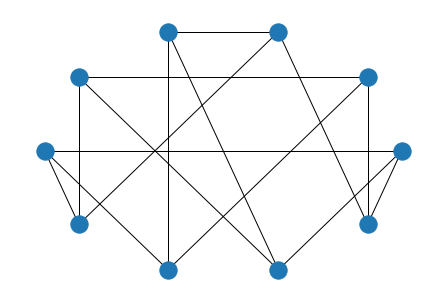

In [3]:
graph_file = "johnson8-2-4.mtx"
graph_type = 1

n = 10
G = nx.complement(load_graph(graph_file, graph_type, n))

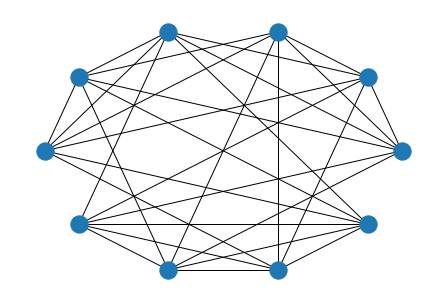

In [4]:
nx.draw(G, nx.circular_layout(G))


## Lovasz

In [5]:
prob_lovasz, Z = lovasz_sdp(G)

In [6]:
np.linalg.eigvalsh(Z.value)

array([-7.69528458e-11, -7.69528156e-11, -7.69527491e-11, -7.69527393e-11,
        1.50000000e-01,  1.50000000e-01,  1.50000000e-01,  1.50000000e-01,
        1.50000000e-01,  2.50000000e-01])

In [7]:
Z_val = remove_small_eigenvalues(Z.value)

In [8]:
Z_center = 1 / n * np.eye(n)

### Fixed point iteration

In [9]:
Z_path = fixed_point_iteration(prob_lovasz, Z, -Z_center, returns_path=True, verbose=True)

initial objective: 2.500000
initial eigenvalues:
[-7.69528458e-11 -7.69528156e-11 -7.69527491e-11 -7.69527393e-11
  1.50000000e-01  1.50000000e-01  1.50000000e-01  1.50000000e-01
  1.50000000e-01  2.50000000e-01]
fixed point objective: 2.500000
fixed point eigenvalues:
[4.40744781e-11 4.40745140e-11 4.40745357e-11 4.40745600e-11
 1.50000000e-01 1.50000000e-01 1.50000000e-01 1.50000000e-01
 1.50000000e-01 2.50000000e-01]
iterations:  1


In [10]:
Z_fixed_point = Z.value
Z.value = Z_val

In [11]:
Z_fixed_point

array([[1.00000000e-01, 5.21318087e-12, 5.21318089e-12, 5.21318100e-12,
        5.21318096e-12, 5.00000000e-02, 5.21318097e-12, 5.21318102e-12,
        5.00000000e-02, 5.00000000e-02],
       [5.21318087e-12, 1.00000000e-01, 5.21318091e-12, 5.21318089e-12,
        5.00000000e-02, 5.21318089e-12, 5.21318102e-12, 5.00000000e-02,
        5.21318106e-12, 5.00000000e-02],
       [5.21318089e-12, 5.21318091e-12, 1.00000000e-01, 5.00000000e-02,
        5.21318099e-12, 5.21318104e-12, 5.00000000e-02, 5.21318094e-12,
        5.21318093e-12, 5.00000000e-02],
       [5.21318100e-12, 5.21318089e-12, 5.00000000e-02, 1.00000000e-01,
        5.21318098e-12, 5.21318089e-12, 5.21318089e-12, 5.00000000e-02,
        5.00000000e-02, 5.21318093e-12],
       [5.21318096e-12, 5.00000000e-02, 5.21318099e-12, 5.21318098e-12,
        1.00000000e-01, 5.21318097e-12, 5.00000000e-02, 5.21318094e-12,
        5.00000000e-02, 5.21318095e-12],
       [5.00000000e-02, 5.21318089e-12, 5.21318104e-12, 5.21318089e-12,
   

In [12]:
try:
    Z_vec = recover_incidence_vector(Z_fixed_point, "lovasz")
    nx.draw(G, nx.circular_layout(G), node_color=Z_vec)
except:
    print("recovery failed")

recovery failed


## Grotschel

In [13]:
prob_grotschel, X, X_plus = grotschel_sdp(G)

In [14]:
X_val = remove_small_eigenvalues(X.value)

In [15]:
X_val

array([[2.50000000e-01, 2.29700883e-11, 2.29701510e-11, 2.29701724e-11,
        2.29701049e-11, 1.25000000e-01, 2.29700914e-11, 2.29701562e-11,
        1.25000000e-01, 1.25000000e-01],
       [2.29701000e-11, 2.50000000e-01, 2.29700662e-11, 2.29700321e-11,
        1.25000000e-01, 2.29699153e-11, 2.29700482e-11, 1.25000000e-01,
        2.29700006e-11, 1.25000000e-01],
       [2.29701488e-11, 2.29700662e-11, 2.50000000e-01, 1.25000000e-01,
        2.29701245e-11, 2.29701446e-11, 1.25000000e-01, 2.29700508e-11,
        2.29700494e-11, 1.25000000e-01],
       [2.29701702e-11, 2.29700321e-11, 1.25000000e-01, 2.50000000e-01,
        2.29700349e-11, 2.29701105e-11, 2.29701323e-11, 1.25000000e-01,
        1.25000000e-01, 2.29700899e-11],
       [2.29701005e-11, 1.25000000e-01, 2.29701084e-11, 2.29700188e-11,
        2.50000000e-01, 2.29699991e-11, 1.25000000e-01, 2.29700581e-11,
        1.25000000e-01, 2.29700619e-11],
       [1.25000000e-01, 2.29699153e-11, 2.29701446e-11, 2.29701382e-11,
   

In [16]:
prob_center_grotschel = cp.Problem(cp.Maximize(cp.log_det(X_plus)), prob_grotschel.constraints)

prob_center_grotschel.solve()

X_center = X.value

X.value = X_val

In [17]:
X_center

array([[1.75189776e-01, 1.55946911e-09, 1.59533784e-09, 1.50864197e-09,
        1.55232318e-09, 5.41489285e-02, 1.56773203e-09, 1.58672503e-09,
        5.41439855e-02, 5.41264398e-02],
       [1.55946911e-09, 1.75188645e-01, 1.57124897e-09, 1.55722875e-09,
        5.41480552e-02, 1.65753421e-09, 1.51549925e-09, 5.41445129e-02,
        1.41588820e-09, 5.41267923e-02],
       [1.59533784e-09, 1.57124897e-09, 1.75186504e-01, 5.41469430e-02,
        1.60806187e-09, 1.62502429e-09, 5.41431168e-02, 1.53616919e-09,
        1.38987914e-09, 5.41277081e-02],
       [1.50864197e-09, 1.55722875e-09, 5.41469430e-02, 1.75208073e-01,
        1.53863704e-09, 1.63180509e-09, 1.50936522e-09, 5.41453080e-02,
        5.41461908e-02, 1.57968245e-09],
       [1.55232318e-09, 5.41480552e-02, 1.60806187e-09, 1.53863704e-09,
        1.75208049e-01, 1.61364545e-09, 5.41437574e-02, 1.53917134e-09,
        5.41452390e-02, 1.55907423e-09],
       [5.41489285e-02, 1.65753421e-09, 1.62502429e-09, 1.63180509e-09,
   

### Fixed point iteration

In [18]:
X_path = fixed_point_iteration(prob_grotschel, X, -X_center, returns_path=True, verbose=True)

initial objective: 2.500000
initial eigenvalues:
[-6.08828305e-17 -2.50789143e-17  6.47683744e-17  1.08989575e-16
  3.75000000e-01  3.75000000e-01  3.75000000e-01  3.75000000e-01
  3.75000000e-01  6.25000001e-01]
current objective: 2.500000
current eigenvalues:
[-3.10438233e-09 -3.10003939e-09 -3.09988084e-09 -3.09031568e-09
  3.74926595e-01  3.74931086e-01  3.75018864e-01  3.75028625e-01
  3.75094773e-01  6.25000061e-01]
current objective: 2.499999
current eigenvalues:
[-3.12789051e-09 -3.09597768e-09 -3.09439856e-09 -3.08134510e-09
  3.74639576e-01  3.74663828e-01  3.75093363e-01  3.75138807e-01
  3.75462504e-01  6.25001306e-01]
current objective: 2.499989
current eigenvalues:
[-3.03736545e-09 -3.01428014e-09 -2.96006273e-09 -2.95525704e-09
  3.73515316e-01  3.73619068e-01  3.75383829e-01  3.75565846e-01
  3.76882936e-01  6.25022110e-01]
current objective: 2.499826
current eigenvalues:
[-1.29219297e-09 -9.02181456e-10 -8.80027502e-10 -6.88732985e-10
  3.69036287e-01  3.69455488e-01  

In [19]:
X_fixed_point = X.value
X.value = X_val

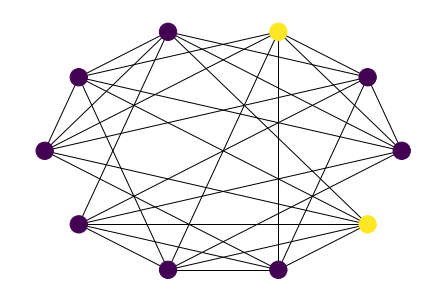

In [20]:
try:
    X_vec = recover_incidence_vector(X_fixed_point, "grotschel")
    nx.draw(G, nx.circular_layout(G), node_color=X_vec)
except:
    print("recovery failed")

## Benson & Ye

In [21]:
prob_benson, V = benson_sdp(G)

In [22]:
V_val = remove_small_eigenvalues(V.value)

In [23]:
prob_center_benson = cp.Problem(cp.Maximize(cp.log_det(V)), prob_benson.constraints)

prob_center_benson.solve()

V_center = V.value
V.value = V_val

### Fixed point iteration

In [24]:
V_path = fixed_point_iteration(prob_benson, V, -V_center, returns_path=True, verbose=True)

initial objective: 2.500000
initial eigenvalues:
[-4.81400451e-16 -6.37671088e-17 -1.31555517e-17  1.55006346e-16
  5.24526476e-16  1.50000000e+00  1.50000000e+00  1.50000000e+00
  1.50000000e+00  1.50000000e+00  3.50000000e+00]
fixed point objective: 2.500000
fixed point eigenvalues:
[-3.93373642e-09  2.36312563e-09  2.36317145e-09  2.36318361e-09
  2.36320053e-09  1.49999055e+00  1.49999246e+00  1.50000155e+00
  1.50000432e+00  1.50001112e+00  3.49999995e+00]
iterations:  1


In [25]:
V_fixed_point = V.value
V.value = V_val

In [26]:
try:
    V_vec = recover_incidence_vector(V_fixed_point, "benson")
    nx.draw(G, nx.circular_layout(G), node_color=V_vec)
except:
    print("recovery failed")

recovery failed


# SDP sampling

In [45]:
Z_samples = sdp_sampling(prob_lovasz, Z, "lovasz", folder, graph_file, 10000)

In [46]:
X_samples = sdp_sampling(prob_grotschel, X, "grotschel", folder, graph_file, 10000)

In [47]:
V_samples = sdp_sampling(prob_benson, V, "benson", folder, graph_file, 10000)

### Lovasz

In [48]:
row = 0
col = 1

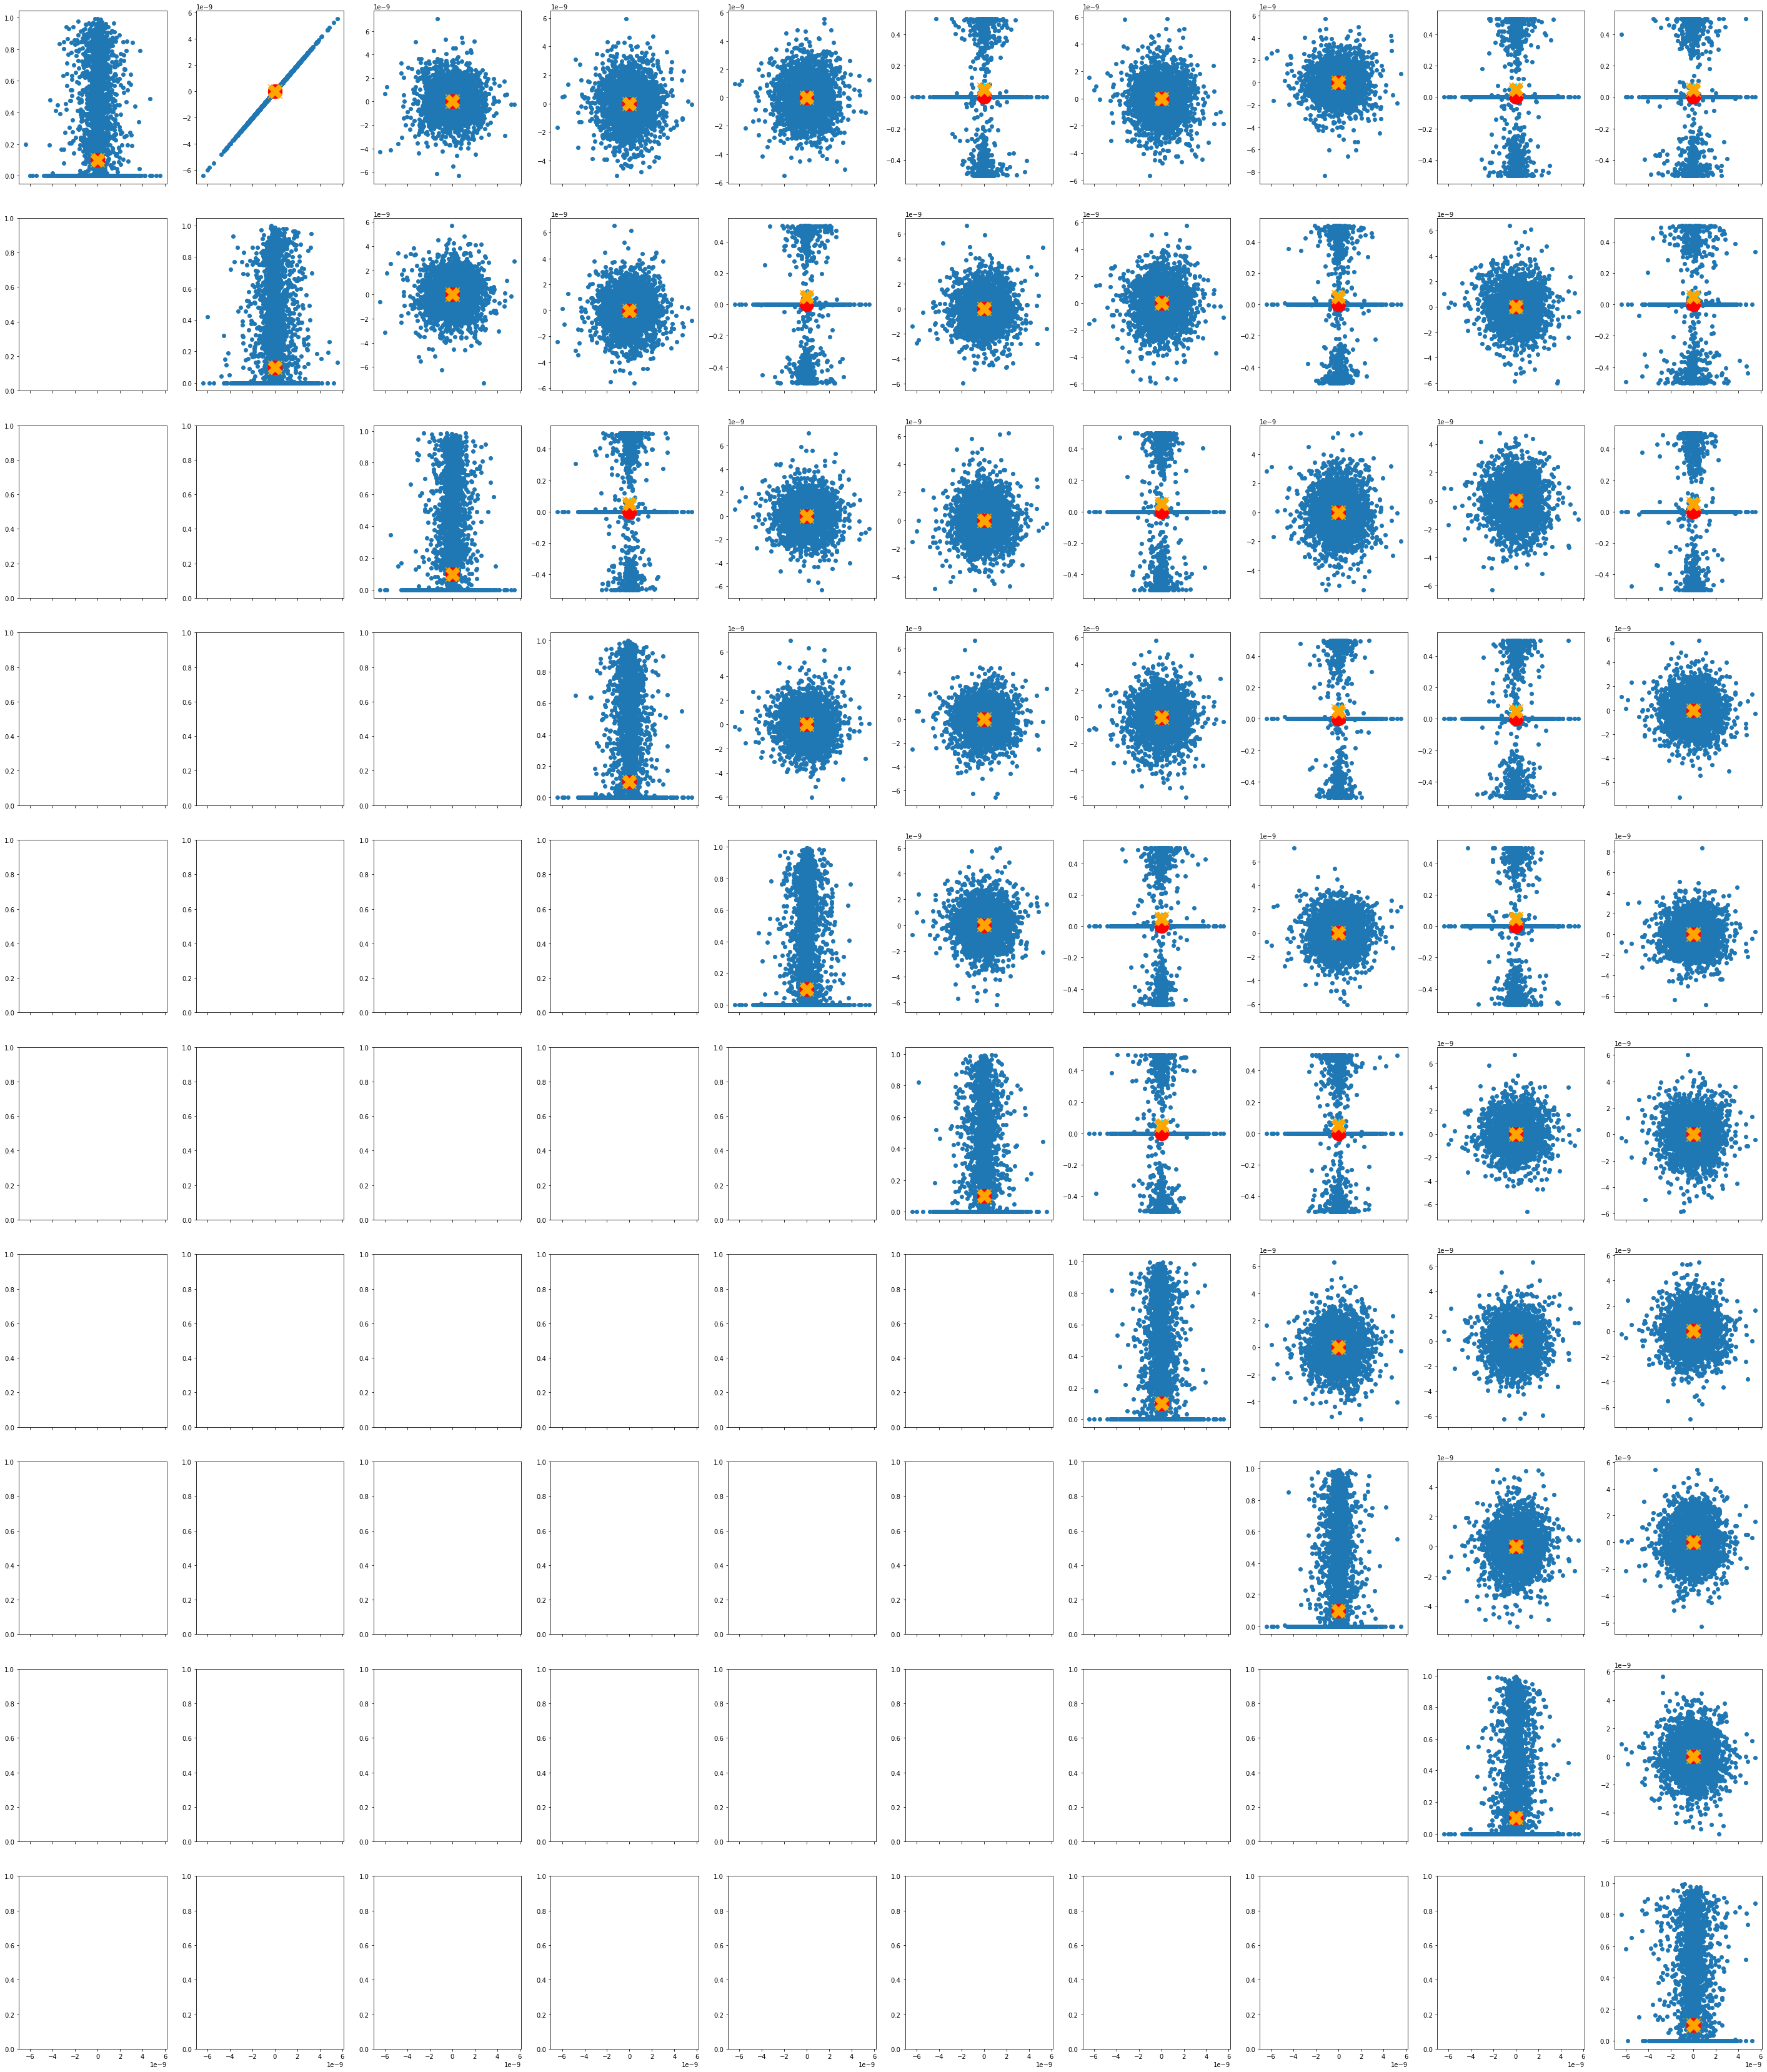

In [49]:
fig, axs = plt.subplots(n, n, figsize=(50, 60), sharex=True)

for j in range(n):
    for i in range(j + 1):
        axs[i, j].scatter(Z_samples[:, row, col], Z_samples[:, i, j])
        axs[i, j].scatter(Z_val[row, col], Z_val[i, j], c="aqua", s=5e2, marker="*")
        axs[i, j].scatter(Z_center[row, col], Z_center[i, j], c="red", s=5e2, marker="o")
        axs[i, j].scatter(Z_fixed_point[row, col], Z_fixed_point[i, j], c="orange", s=5e2, marker="X")
        axs[i, j].scatter(Z_path[:, row, col], Z_path[:, i, j], c="orange", s=5e2, marker="x")

### Grotschel

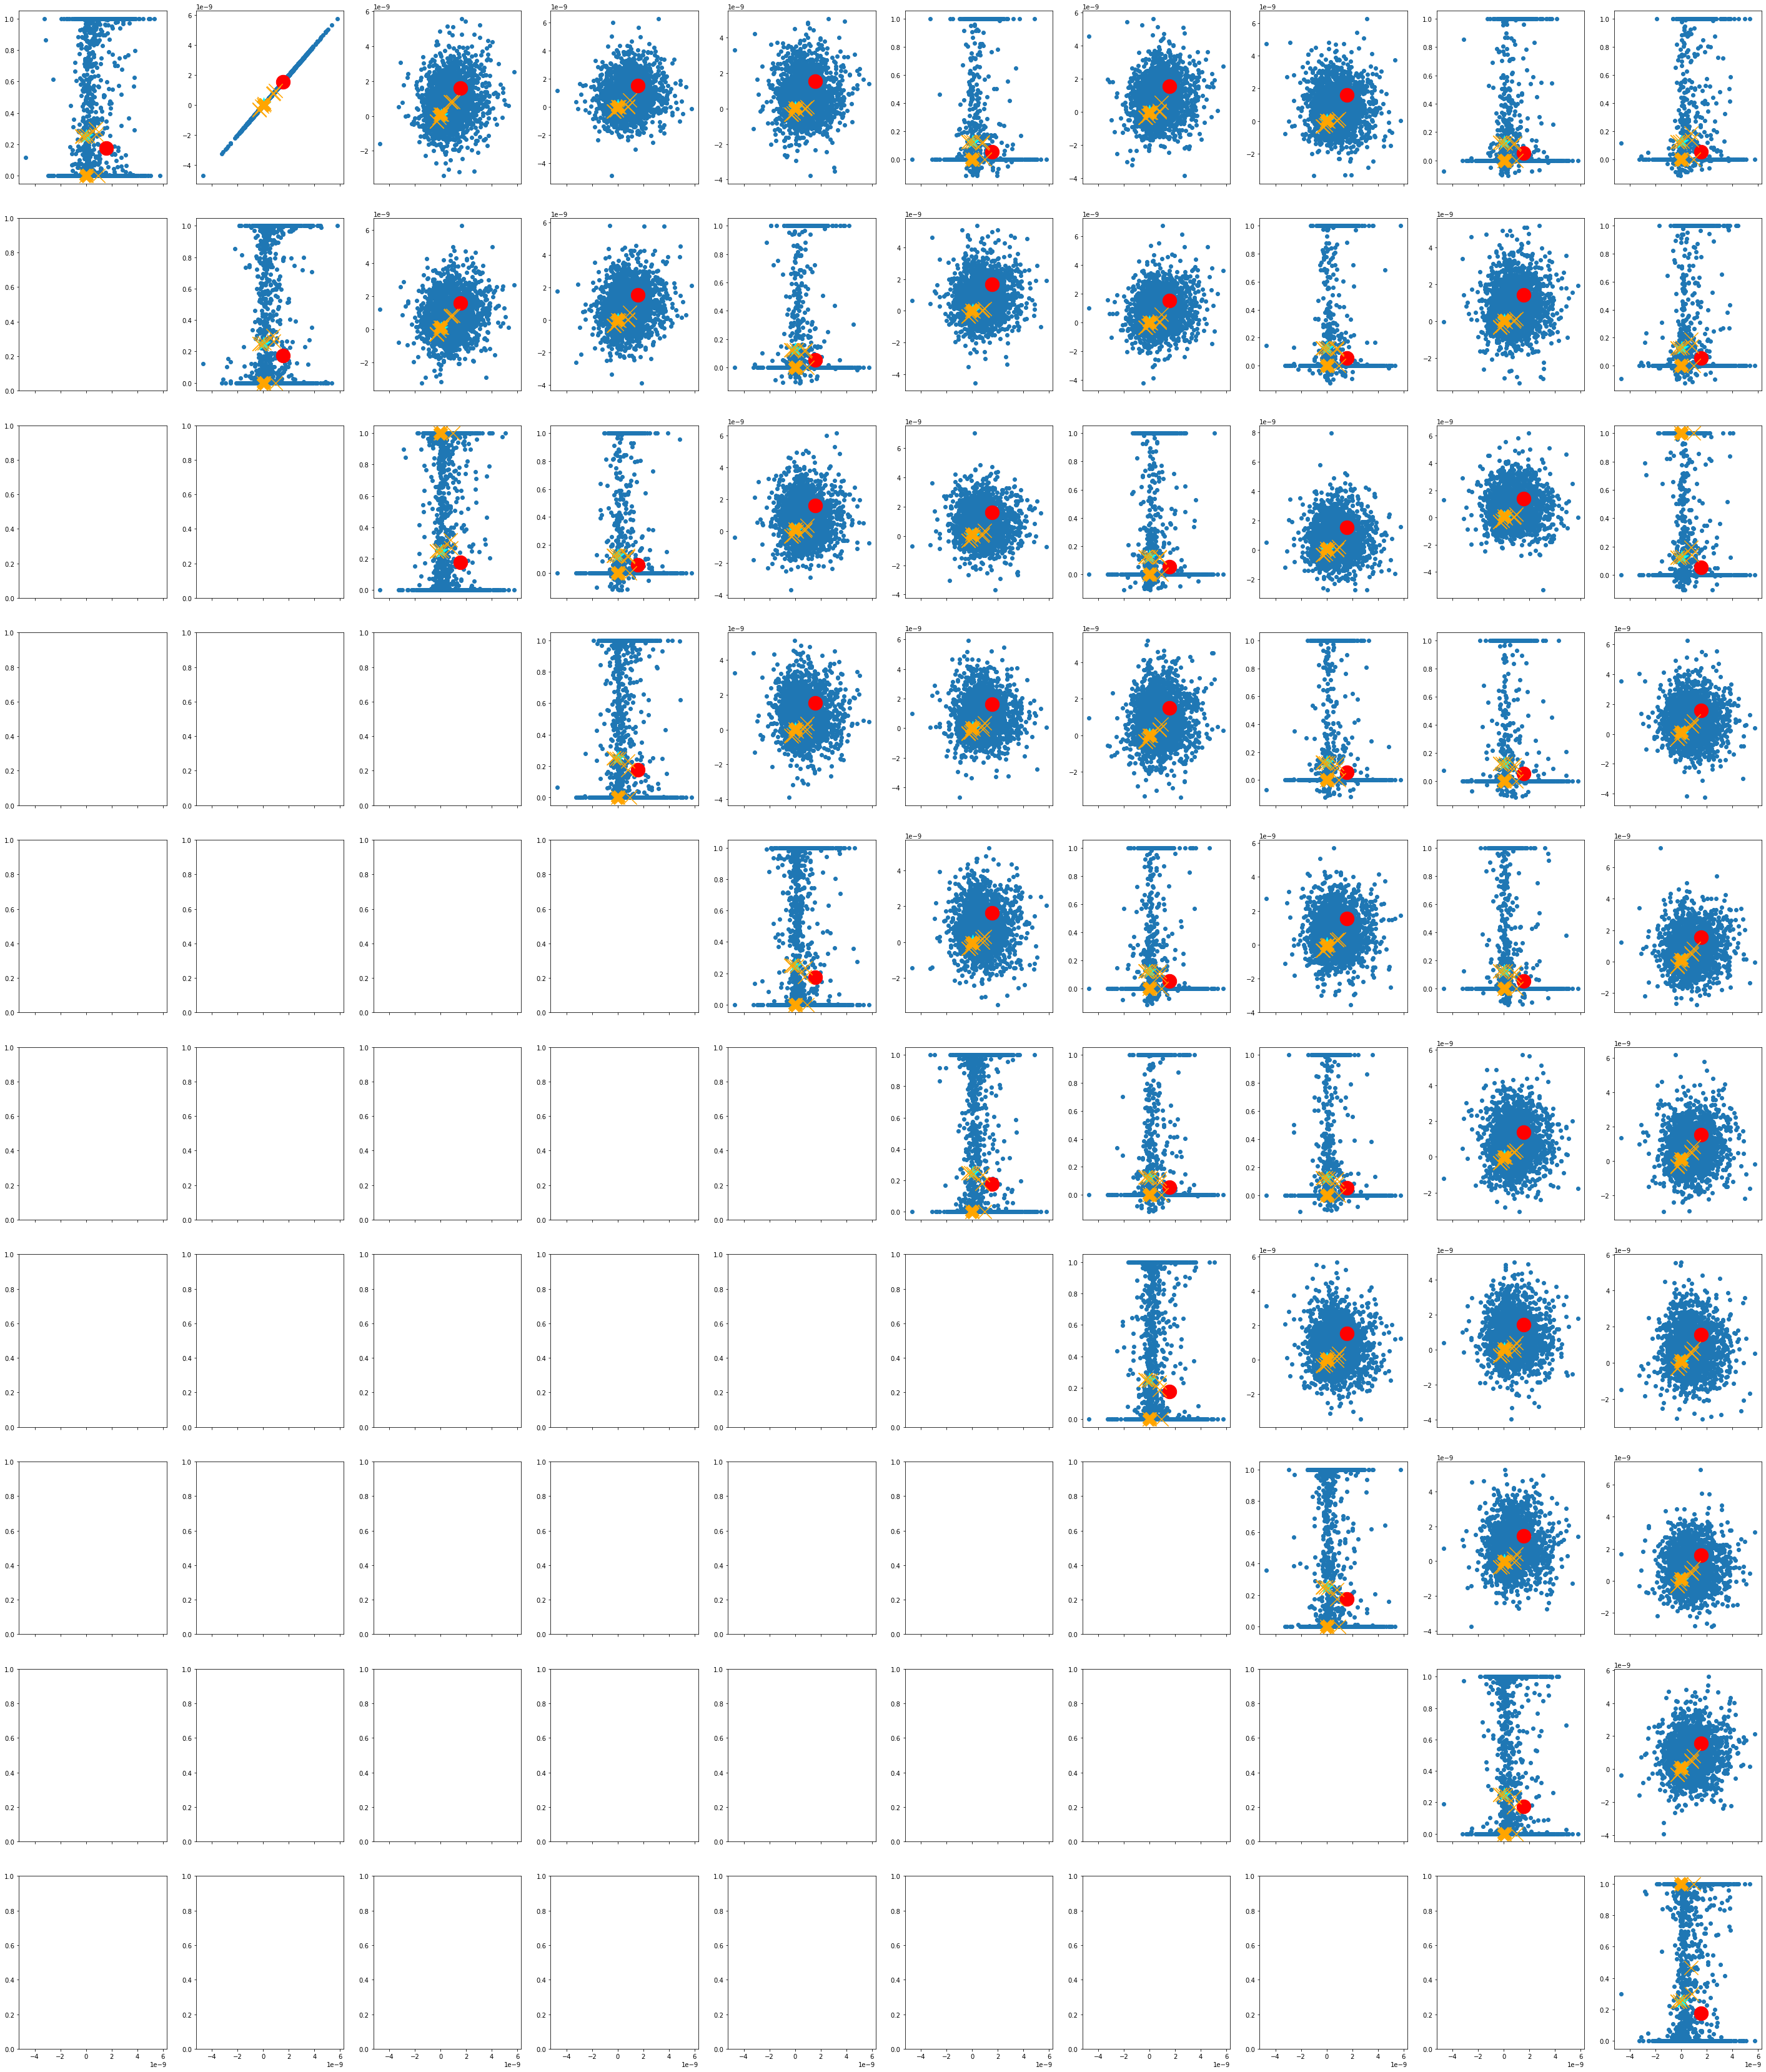

In [50]:
fig, axs = plt.subplots(n, n, figsize=(50, 60), sharex=True)

for j in range(n):
    for i in range(j + 1):
        axs[i, j].scatter(X_samples[:, row, col], X_samples[:, i, j])
        axs[i, j].scatter(X_val[row, col], X_val[i, j], c="aqua", s=5e2, marker="*")
        axs[i, j].scatter(X_center[row, col], X_center[i, j], c="red", s=5e2, marker="o")
        axs[i, j].scatter(X_fixed_point[row, col], X_fixed_point[i, j], c="orange", s=5e2, marker="X")
        axs[i, j].scatter(X_path[:, row, col], X_path[:, i, j], c="orange", s=5e2, marker="x")

### Benson & Ye

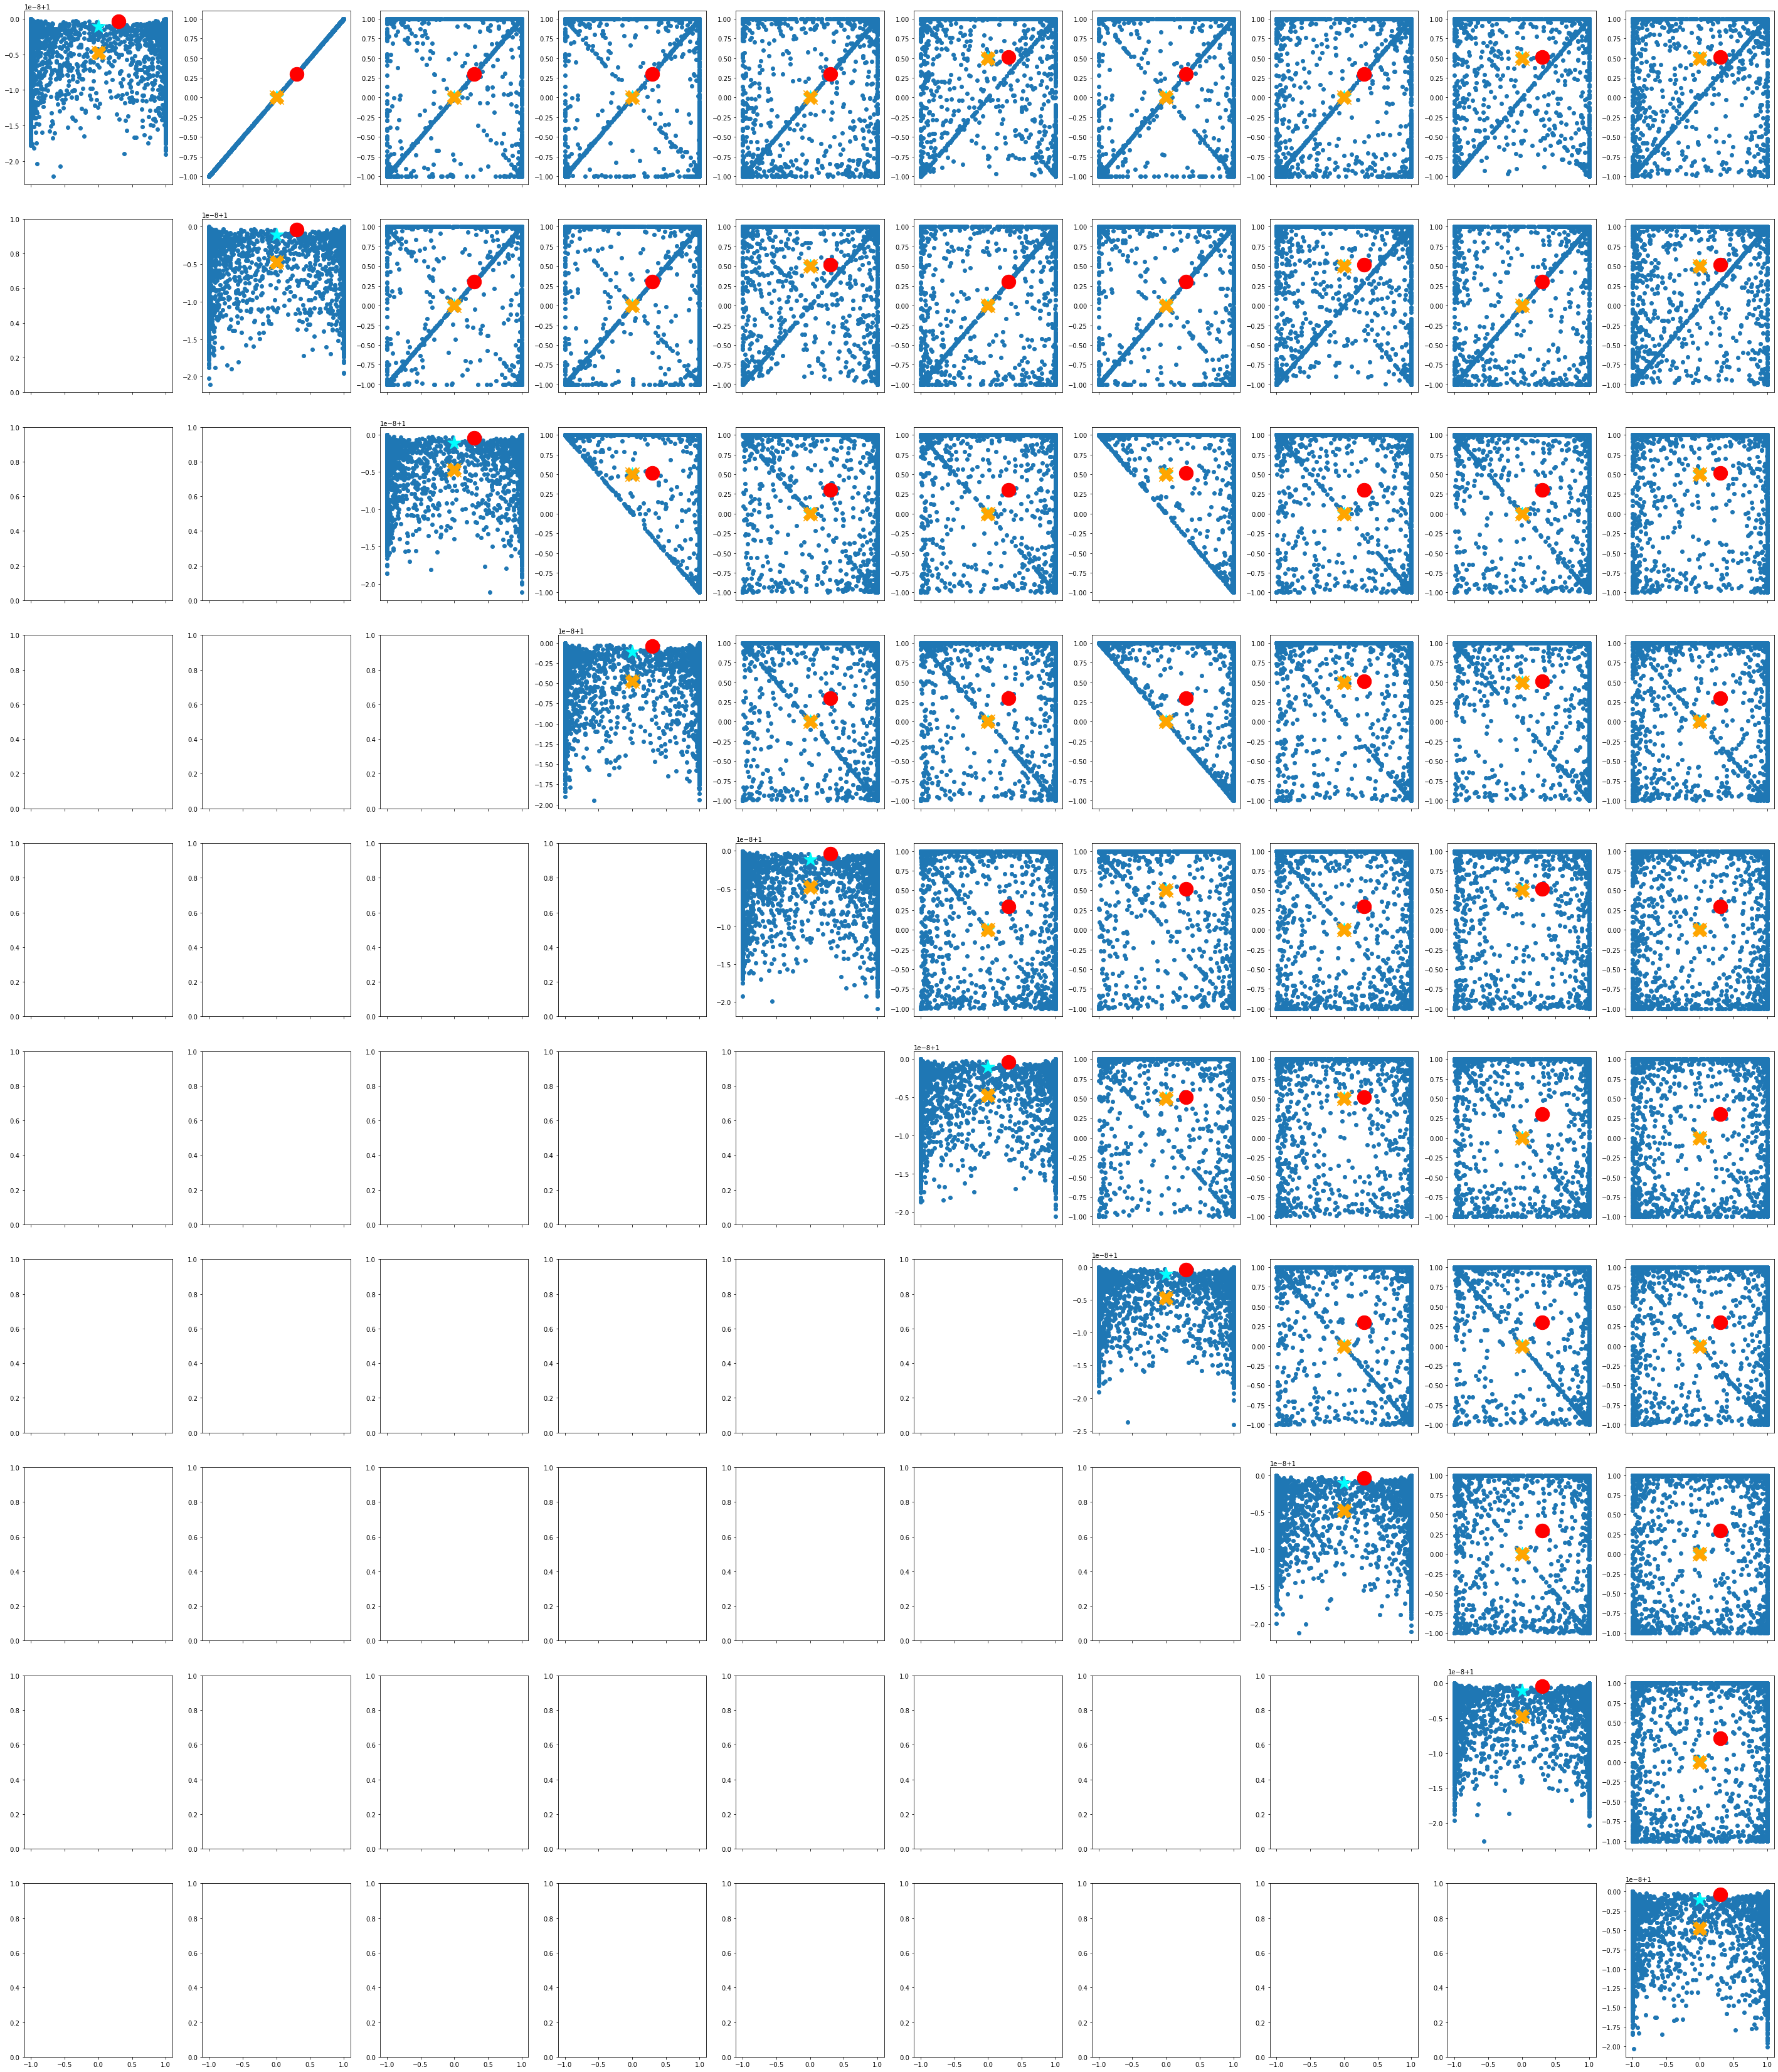

In [51]:
fig, axs = plt.subplots(n, n, figsize=(50, 60), sharex=True)

for j in range(n):
    for i in range(j + 1):
        axs[i, j].scatter(V_samples[:, row, col], V_samples[:, i, j])
        axs[i, j].scatter(V_val[row, col], V_val[i, j], c="aqua", s=5e2, marker="*")
        axs[i, j].scatter(V_center[row, col], V_center[i, j], c="red", s=5e2, marker="o")
        axs[i, j].scatter(V_fixed_point[row, col], V_fixed_point[i, j], c="orange", s=5e2, marker="X")
        axs[i, j].scatter(V_path[:, row, col], V_path[:, i, j], c="orange", s=5e2, marker="x")